In [ ]:
!pip install ipython-autotime
# !pip install -U scikit-learn
%load_ext autotime

time: 2.17 ms (started: 2021-01-22 14:18:33 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 33.7 s (started: 2021-01-22 14:18:33 +00:00)


In [ ]:
!pwd
import os
os.chdir('/content/drive/My Drive/ML/ml-project-master/src/')
!pwd

/content
/content/drive/My Drive/ML/ml-project-master/src
time: 404 ms (started: 2021-01-22 14:19:10 +00:00)


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid, relu, tanh
from tensorflow.keras import layers
from tensorflow.keras import initializers
import tensorflow.keras.utils
import sys

time: 2.95 s (started: 2021-01-22 14:19:11 +00:00)


In [ ]:
from utility import *

time: 243 ms (started: 2021-01-22 14:19:14 +00:00)


# Import Dataset

In [ ]:
Xtrain, Xtest, ytrain, ytest = load_monk("1")

time: 6.46 s (started: 2021-01-22 14:19:14 +00:00)


In [ ]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(124, 17)
(432, 17)
(124, 1)
(432, 1)
time: 4.13 ms (started: 2021-01-22 14:19:20 +00:00)


# Define Models

### Model 1

first model:  
    17->3->1  
    SGD  
    lr = 0.01  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1000

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh,
#                kernel_initializer=initializers.GlorotUniform(),
#                bias_initializer=initializers.Zeros(),
               # kernel_regularizer=L2
               ))
model.add(tf.keras.layers.Dense(1, activation=tanh,
#                 kernel_initializer=initializers.GlorotUniform(),
#                 bias_initializer=initializers.Zeros(),
                # kernel_regularizer=L2
               ))

time: 295 ms (started: 2021-01-16 15:35:20 +00:00)


In [ ]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 25.2 ms (started: 2021-01-16 15:35:20 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
#                     validation_steps=5,
                    verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 1.3328 - accuracy: 0.5000 - val_loss: 1.2152 - val_accuracy: 0.4838
Epoch 2/1000
1/1 - 0s - loss: 1.2625 - accuracy: 0.4839 - val_loss: 1.1439 - val_accuracy: 0.4722
Epoch 3/1000
1/1 - 0s - loss: 1.1908 - accuracy: 0.4597 - val_loss: 1.0725 - val_accuracy: 0.4699
Epoch 4/1000
1/1 - 0s - loss: 1.1183 - accuracy: 0.4597 - val_loss: 1.0018 - val_accuracy: 0.4699
Epoch 5/1000
1/1 - 0s - loss: 1.0461 - accuracy: 0.4597 - val_loss: 0.9329 - val_accuracy: 0.4653
Epoch 6/1000
1/1 - 0s - loss: 0.9749 - accuracy: 0.4516 - val_loss: 0.8665 - val_accuracy: 0.4606
Epoch 7/1000
1/1 - 0s - loss: 0.9059 - accuracy: 0.4516 - val_loss: 0.8035 - val_accuracy: 0.4560
Epoch 8/1000
1/1 - 0s - loss: 0.8399 - accuracy: 0.4516 - val_loss: 0.7445 - val_accuracy: 0.4560
Epoch 9/1000
1/1 - 0s - loss: 0.7775 - accuracy: 0.4516 - val_loss: 0.6901 - val_accuracy: 0.4699
Epoch 10/1000
1/1 - 0s - loss: 0.7196 - accuracy: 0.4758 - val_loss: 0.6405 - val_accuracy: 0.4699
Epoch 11/1000
1/1 -

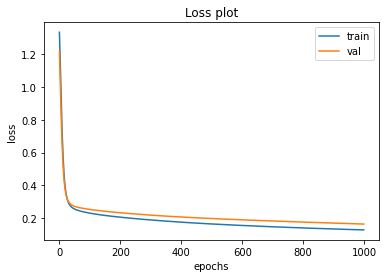

time: 248 ms (started: 2021-01-16 15:36:11 +00:00)


In [ ]:
plot_loss(history)

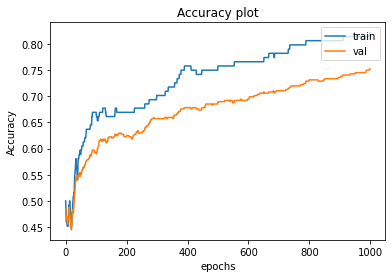

time: 197 ms (started: 2021-01-16 15:36:12 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.1292176|	0.82|
Test	|0.1648703|	0.75|
time: 3.72 ms (started: 2021-01-16 15:36:12 +00:00)


from the plot of the loss it seem that this model is slowing down too much slow so try to increase the learning rate and see if it go better and don't overfit.

## Model 2

first model:  
    17->3->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1000

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(3, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 43.8 ms (started: 2021-01-16 15:36:12 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 0.6603 - accuracy: 0.4677 - val_loss: 0.4055 - val_accuracy: 0.4954
Epoch 2/1000
1/1 - 0s - loss: 0.4539 - accuracy: 0.4113 - val_loss: 0.3465 - val_accuracy: 0.4745
Epoch 3/1000
1/1 - 0s - loss: 0.3758 - accuracy: 0.4355 - val_loss: 0.3251 - val_accuracy: 0.4815
Epoch 4/1000
1/1 - 0s - loss: 0.3438 - accuracy: 0.4839 - val_loss: 0.3151 - val_accuracy: 0.4861
Epoch 5/1000
1/1 - 0s - loss: 0.3274 - accuracy: 0.5161 - val_loss: 0.3091 - val_accuracy: 0.4838
Epoch 6/1000
1/1 - 0s - loss: 0.3170 - accuracy: 0.5242 - val_loss: 0.3045 - val_accuracy: 0.4861
Epoch 7/1000
1/1 - 0s - loss: 0.3092 - accuracy: 0.5242 - val_loss: 0.3006 - val_accuracy: 0.4931
Epoch 8/1000
1/1 - 0s - loss: 0.3026 - accuracy: 0.5242 - val_loss: 0.2970 - val_accuracy: 0.5000
Epoch 9/1000
1/1 - 0s - loss: 0.2967 - accuracy: 0.5242 - val_loss: 0.2936 - val_accuracy: 0.5000
Epoch 10/1000
1/1 - 0s - loss: 0.2912 - accuracy: 0.5323 - val_loss: 0.2903 - val_accuracy: 0.5000
Epoch 11/1000
1/1 -

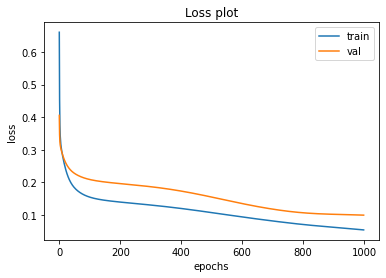

time: 202 ms (started: 2021-01-16 15:37:03 +00:00)


In [ ]:
plot_loss(history)

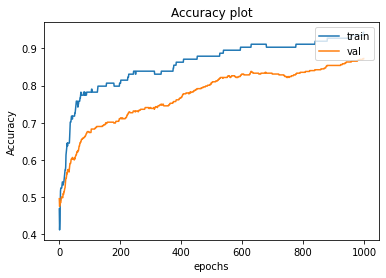

time: 198 ms (started: 2021-01-16 15:37:04 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0546202|	0.94|
Test	|0.0998787|	0.87|
time: 3.91 ms (started: 2021-01-16 15:37:04 +00:00)


Now it is performing much better, but we have a bit of overfitting, how we can see (but let's try to add a neuron and some epoch)

## Model 3

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 41.8 ms (started: 2021-01-16 15:37:04 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.4530 - accuracy: 0.5161 - val_loss: 0.4366 - val_accuracy: 0.4977
Epoch 2/1200
1/1 - 0s - loss: 0.4408 - accuracy: 0.5161 - val_loss: 0.4258 - val_accuracy: 0.5000
Epoch 3/1200
1/1 - 0s - loss: 0.4285 - accuracy: 0.5161 - val_loss: 0.4157 - val_accuracy: 0.5000
Epoch 4/1200
1/1 - 0s - loss: 0.4163 - accuracy: 0.5161 - val_loss: 0.4063 - val_accuracy: 0.5116
Epoch 5/1200
1/1 - 0s - loss: 0.4044 - accuracy: 0.5323 - val_loss: 0.3976 - val_accuracy: 0.5116
Epoch 6/1200
1/1 - 0s - loss: 0.3928 - accuracy: 0.5403 - val_loss: 0.3894 - val_accuracy: 0.5139
Epoch 7/1200
1/1 - 0s - loss: 0.3815 - accuracy: 0.5403 - val_loss: 0.3818 - val_accuracy: 0.5116
Epoch 8/1200
1/1 - 0s - loss: 0.3706 - accuracy: 0.5403 - val_loss: 0.3746 - val_accuracy: 0.5208
Epoch 9/1200
1/1 - 0s - loss: 0.3600 - accuracy: 0.5484 - val_loss: 0.3678 - val_accuracy: 0.5278
Epoch 10/1200
1/1 - 0s - loss: 0.3498 - accuracy: 0.5565 - val_loss: 0.3612 - val_accuracy: 0.5301
Epoch 11/1200
1/1 -

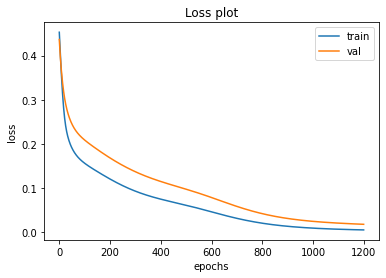

time: 198 ms (started: 2021-01-16 15:38:05 +00:00)


In [ ]:
plot_loss(history)

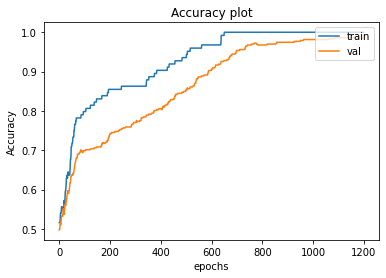

time: 212 ms (started: 2021-01-16 15:38:05 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0052901|	1.00|
Test	|0.0180066|	0.99|
time: 3.2 ms (started: 2021-01-16 15:38:06 +00:00)


Okkk nice, we are achiving better accuracy at every step, now we are fine but we know that we can do better and achive 100% accuracy on test too, so try with different activation function in the hidden layer

## Model 4

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=sigmoid))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0., nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 51.2 ms (started: 2021-01-16 15:38:06 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 0s - loss: 0.2769 - accuracy: 0.5161 - val_loss: 0.2606 - val_accuracy: 0.5185
Epoch 2/1200
1/1 - 0s - loss: 0.2707 - accuracy: 0.5161 - val_loss: 0.2557 - val_accuracy: 0.5324
Epoch 3/1200
1/1 - 0s - loss: 0.2657 - accuracy: 0.5161 - val_loss: 0.2520 - val_accuracy: 0.5278
Epoch 4/1200
1/1 - 0s - loss: 0.2618 - accuracy: 0.5000 - val_loss: 0.2493 - val_accuracy: 0.5231
Epoch 5/1200
1/1 - 0s - loss: 0.2588 - accuracy: 0.5000 - val_loss: 0.2474 - val_accuracy: 0.5394
Epoch 6/1200
1/1 - 0s - loss: 0.2566 - accuracy: 0.5081 - val_loss: 0.2459 - val_accuracy: 0.5394
Epoch 7/1200
1/1 - 0s - loss: 0.2549 - accuracy: 0.5161 - val_loss: 0.2449 - val_accuracy: 0.5556
Epoch 8/1200
1/1 - 0s - loss: 0.2535 - accuracy: 0.5403 - val_loss: 0.2441 - val_accuracy: 0.5602
Epoch 9/1200
1/1 - 0s - loss: 0.2524 - accuracy: 0.5403 - val_loss: 0.2435 - val_accuracy: 0.5579
Epoch 10/1200
1/1 - 0s - loss: 0.2515 - accuracy: 0.5242 - val_loss: 0.2429 - val_accuracy: 0.5625
Epoch 11/1200
1/1 -

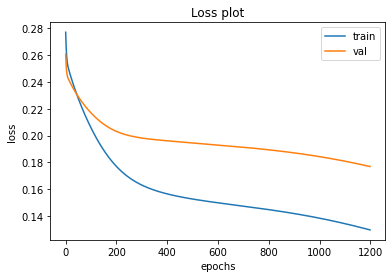

time: 248 ms (started: 2021-01-16 15:39:08 +00:00)


In [ ]:
plot_loss(history)

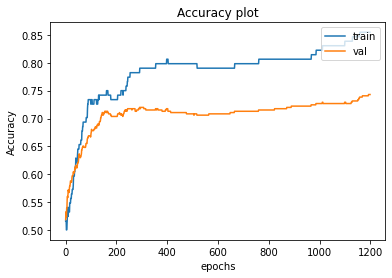

time: 240 ms (started: 2021-01-16 15:39:08 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.1296843|	0.85|
Test	|0.1769056|	0.74|
time: 6.8 ms (started: 2021-01-16 15:39:09 +00:00)


The sigmoid function don't work really well, so don't use it, for the next experiment lets try to add the momentum for the SGD optimizer

## Model 5

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.6  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=1200

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.6, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 53.7 ms (started: 2021-01-16 15:39:09 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/1200
1/1 - 1s - loss: 0.7002 - accuracy: 0.3710 - val_loss: 0.4548 - val_accuracy: 0.4861
Epoch 2/1200
1/1 - 0s - loss: 0.4760 - accuracy: 0.4435 - val_loss: 0.3488 - val_accuracy: 0.5185
Epoch 3/1200
1/1 - 0s - loss: 0.3647 - accuracy: 0.5000 - val_loss: 0.3452 - val_accuracy: 0.5231
Epoch 4/1200
1/1 - 0s - loss: 0.3540 - accuracy: 0.5323 - val_loss: 0.3517 - val_accuracy: 0.5301
Epoch 5/1200
1/1 - 0s - loss: 0.3565 - accuracy: 0.5323 - val_loss: 0.3469 - val_accuracy: 0.5301
Epoch 6/1200
1/1 - 0s - loss: 0.3502 - accuracy: 0.5323 - val_loss: 0.3322 - val_accuracy: 0.5347
Epoch 7/1200
1/1 - 0s - loss: 0.3346 - accuracy: 0.5484 - val_loss: 0.3122 - val_accuracy: 0.5440
Epoch 8/1200
1/1 - 0s - loss: 0.3135 - accuracy: 0.5806 - val_loss: 0.2936 - val_accuracy: 0.5625
Epoch 9/1200
1/1 - 0s - loss: 0.2921 - accuracy: 0.5806 - val_loss: 0.2820 - val_accuracy: 0.5671
Epoch 10/1200
1/1 - 0s - loss: 0.2758 - accuracy: 0.5565 - val_loss: 0.2774 - val_accuracy: 0.5532
Epoch 11/1200
1/1 -

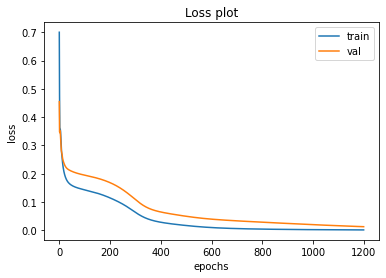

time: 207 ms (started: 2021-01-16 15:40:11 +00:00)


In [ ]:
plot_loss(history)

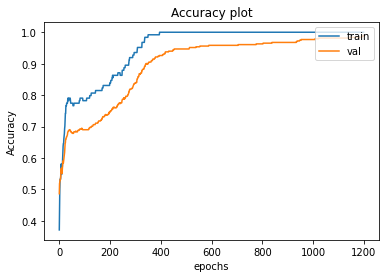

time: 212 ms (started: 2021-01-16 15:40:11 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0015070|	1.00|
Test	|0.0129068|	0.99|
time: 3.15 ms (started: 2021-01-16 15:40:11 +00:00)


As we can see with the addition of momentum the network converge to 100% accuracy much faster, so try to use less epochs like 600.

## Model 6

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.6  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=600

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.6, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 44.5 ms (started: 2021-01-16 15:40:11 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
1/1 - 0s - loss: 0.2629 - accuracy: 0.6210 - val_loss: 0.3072 - val_accuracy: 0.5810
Epoch 2/600
1/1 - 0s - loss: 0.2526 - accuracy: 0.6210 - val_loss: 0.2957 - val_accuracy: 0.5787
Epoch 3/600
1/1 - 0s - loss: 0.2423 - accuracy: 0.6210 - val_loss: 0.2869 - val_accuracy: 0.5949
Epoch 4/600
1/1 - 0s - loss: 0.2353 - accuracy: 0.6532 - val_loss: 0.2800 - val_accuracy: 0.5903
Epoch 5/600
1/1 - 0s - loss: 0.2298 - accuracy: 0.6613 - val_loss: 0.2736 - val_accuracy: 0.5903
Epoch 6/600
1/1 - 0s - loss: 0.2243 - accuracy: 0.6532 - val_loss: 0.2674 - val_accuracy: 0.6042
Epoch 7/600
1/1 - 0s - loss: 0.2185 - accuracy: 0.6532 - val_loss: 0.2616 - val_accuracy: 0.6111
Epoch 8/600
1/1 - 0s - loss: 0.2129 - accuracy: 0.6774 - val_loss: 0.2564 - val_accuracy: 0.6088
Epoch 9/600
1/1 - 0s - loss: 0.2078 - accuracy: 0.6774 - val_loss: 0.2517 - val_accuracy: 0.6134
Epoch 10/600
1/1 - 0s - loss: 0.2034 - accuracy: 0.6855 - val_loss: 0.2475 - val_accuracy: 0.6273
Epoch 11/600
1/1 - 0s - loss:

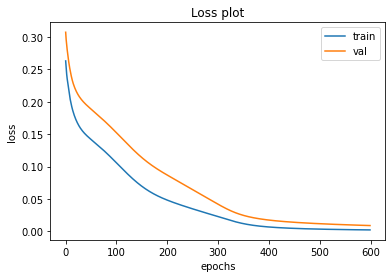

time: 202 ms (started: 2021-01-16 15:40:42 +00:00)


In [ ]:
plot_loss(history)

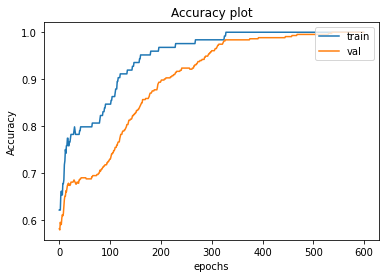

time: 193 ms (started: 2021-01-16 15:40:42 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0022750|	1.00|
Test	|0.0090086|	1.00|
time: 4.86 ms (started: 2021-01-16 15:40:43 +00:00)


Ok we are fine, but now try to use the nesterov SGD too and see what change

## Model 7

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.6  
    nesterov = True  
    kernel_regularize=None  
    loss = MSE

In [ ]:
BATCH_SIZE = len(Xtrain)
NUM_EPOCHS=600

L2 = tf.keras.regularizers.L2(l2=0.01)

model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.6, nesterov=True)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 46.1 ms (started: 2021-01-16 15:40:43 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
1/1 - 0s - loss: 0.6536 - accuracy: 0.4597 - val_loss: 0.3931 - val_accuracy: 0.4398
Epoch 2/600
1/1 - 0s - loss: 0.4157 - accuracy: 0.4435 - val_loss: 0.3300 - val_accuracy: 0.4190
Epoch 3/600
1/1 - 0s - loss: 0.3394 - accuracy: 0.3952 - val_loss: 0.3161 - val_accuracy: 0.4329
Epoch 4/600
1/1 - 0s - loss: 0.3162 - accuracy: 0.4194 - val_loss: 0.3092 - val_accuracy: 0.4676
Epoch 5/600
1/1 - 0s - loss: 0.3030 - accuracy: 0.4919 - val_loss: 0.3017 - val_accuracy: 0.4699
Epoch 6/600
1/1 - 0s - loss: 0.2905 - accuracy: 0.5081 - val_loss: 0.2936 - val_accuracy: 0.4861
Epoch 7/600
1/1 - 0s - loss: 0.2779 - accuracy: 0.5161 - val_loss: 0.2861 - val_accuracy: 0.5000
Epoch 8/600
1/1 - 0s - loss: 0.2664 - accuracy: 0.5484 - val_loss: 0.2801 - val_accuracy: 0.5069
Epoch 9/600
1/1 - 0s - loss: 0.2565 - accuracy: 0.5726 - val_loss: 0.2754 - val_accuracy: 0.4977
Epoch 10/600
1/1 - 0s - loss: 0.2486 - accuracy: 0.5887 - val_loss: 0.2718 - val_accuracy: 0.5046
Epoch 11/600
1/1 - 0s - loss:

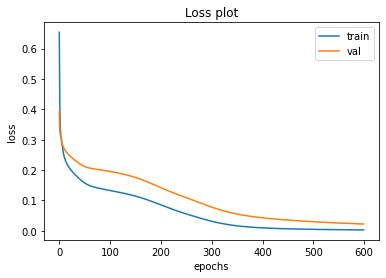

time: 197 ms (started: 2021-01-16 15:41:14 +00:00)


In [ ]:
plot_loss(history)

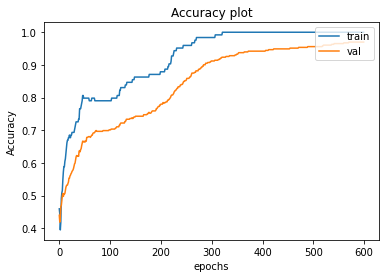

time: 203 ms (started: 2021-01-16 15:41:14 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0030328|	1.00|
Test	|0.0224586|	0.97|
time: 2.23 ms (started: 2021-01-16 15:41:14 +00:00)


As we can see with the nesterov the model need more training epochs to achive the 100% accuracy

## Model 8

first model:  
    17->4->1  
    SGD  
    lr = 0.1  
    momentum = 0.6  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

Try to change the batch size and see how the model work

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS=600


model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(4, activation=tanh, kernel_initializer=initializers.GlorotUniform()))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.6, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 35.7 ms (started: 2021-01-22 14:30:29 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
4/4 - 0s - loss: 0.5251 - accuracy: 0.5565 - val_loss: 0.4294 - val_accuracy: 0.4884
Epoch 2/600
4/4 - 0s - loss: 0.4054 - accuracy: 0.4919 - val_loss: 0.3970 - val_accuracy: 0.4907
Epoch 3/600
4/4 - 0s - loss: 0.3338 - accuracy: 0.5726 - val_loss: 0.3507 - val_accuracy: 0.4884
Epoch 4/600
4/4 - 0s - loss: 0.2776 - accuracy: 0.5726 - val_loss: 0.2985 - val_accuracy: 0.5301
Epoch 5/600
4/4 - 0s - loss: 0.2344 - accuracy: 0.6774 - val_loss: 0.2527 - val_accuracy: 0.5926
Epoch 6/600
4/4 - 0s - loss: 0.2008 - accuracy: 0.7177 - val_loss: 0.2271 - val_accuracy: 0.6782
Epoch 7/600
4/4 - 0s - loss: 0.1851 - accuracy: 0.7581 - val_loss: 0.2126 - val_accuracy: 0.6875
Epoch 8/600
4/4 - 0s - loss: 0.1813 - accuracy: 0.7742 - val_loss: 0.2084 - val_accuracy: 0.7199
Epoch 9/600
4/4 - 0s - loss: 0.1732 - accuracy: 0.7581 - val_loss: 0.1993 - val_accuracy: 0.7014
Epoch 10/600
4/4 - 0s - loss: 0.1693 - accuracy: 0.8065 - val_loss: 0.2036 - val_accuracy: 0.6481
Epoch 11/600
4/4 - 0s - loss:

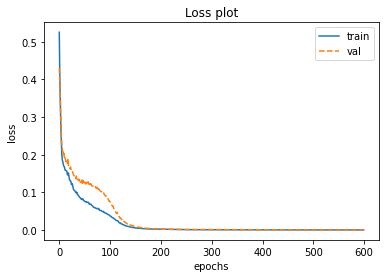

time: 197 ms (started: 2021-01-22 14:31:07 +00:00)


In [ ]:
plot_loss(history)

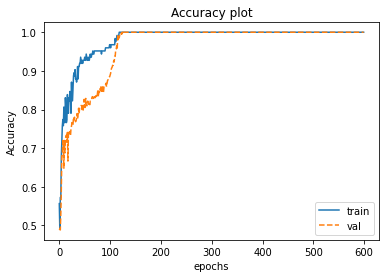

time: 205 ms (started: 2021-01-22 14:31:07 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0002508|	1.00|
Test	|0.0002584|	1.00|
time: 4.35 ms (started: 2021-01-22 14:31:07 +00:00)


With a batch_size=32 the model converge in a faster way

## Model 8.1 600 epochs momentum = 0.8 FINAL

first model:  
    17->5->1  
    SGD  
    lr = 0.1  
    momentum = 1.0  
    nesterov = False  
    kernel_regularize=None  
    loss = MSE

Try to change the batch size and see how the model work

In [ ]:
BATCH_SIZE = 32
NUM_EPOCHS= 600


model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(17)))
model.add(tf.keras.layers.Dense(5, activation=tanh, kernel_initializer=initializers.GlorotUniform()))
model.add(tf.keras.layers.Dense(1, activation=tanh))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.8, nesterov=False)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MSE,
              metrics='accuracy')

time: 38 ms (started: 2021-01-22 14:34:35 +00:00)


In [ ]:
history = model.fit(Xtrain, ytrain,
                    batch_size=BATCH_SIZE,
                    epochs=NUM_EPOCHS,
                    validation_data=(Xtest, ytest),
                    verbose=2)

Epoch 1/600
4/4 - 0s - loss: 0.2722 - accuracy: 0.6048 - val_loss: 0.2781 - val_accuracy: 0.5301
Epoch 2/600
4/4 - 0s - loss: 0.2348 - accuracy: 0.6452 - val_loss: 0.2553 - val_accuracy: 0.5556
Epoch 3/600
4/4 - 0s - loss: 0.2175 - accuracy: 0.6613 - val_loss: 0.2484 - val_accuracy: 0.6181
Epoch 4/600
4/4 - 0s - loss: 0.2160 - accuracy: 0.6774 - val_loss: 0.2420 - val_accuracy: 0.6088
Epoch 5/600
4/4 - 0s - loss: 0.2011 - accuracy: 0.7177 - val_loss: 0.2350 - val_accuracy: 0.6435
Epoch 6/600
4/4 - 0s - loss: 0.1943 - accuracy: 0.7419 - val_loss: 0.2309 - val_accuracy: 0.6574
Epoch 7/600
4/4 - 0s - loss: 0.1842 - accuracy: 0.7339 - val_loss: 0.2248 - val_accuracy: 0.6829
Epoch 8/600
4/4 - 0s - loss: 0.1765 - accuracy: 0.7742 - val_loss: 0.2178 - val_accuracy: 0.6852
Epoch 9/600
4/4 - 0s - loss: 0.1702 - accuracy: 0.7984 - val_loss: 0.2125 - val_accuracy: 0.7153
Epoch 10/600
4/4 - 0s - loss: 0.1595 - accuracy: 0.8145 - val_loss: 0.2059 - val_accuracy: 0.6968
Epoch 11/600
4/4 - 0s - loss:

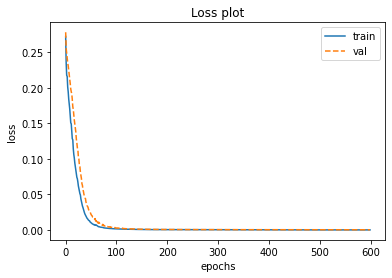

time: 197 ms (started: 2021-01-22 14:35:13 +00:00)


In [ ]:
plot_loss(history)

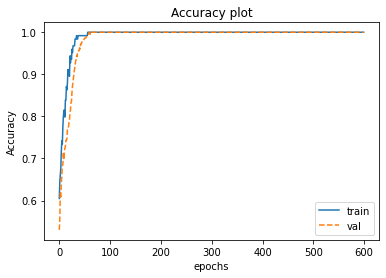

time: 205 ms (started: 2021-01-22 14:35:13 +00:00)


In [ ]:
plot_accuracy(history)

In [ ]:
data = [
    history.history['loss'][-1],
    history.history['accuracy'][-1],
    history.history['val_loss'][-1],
    history.history['val_accuracy'][-1],
]
table_info(data)

	    MSE     Accuracy
-----------------------------
Train	|0.0001233|	1.00|
Test	|0.0003103|	1.00|
time: 4.44 ms (started: 2021-01-22 14:35:13 +00:00)


With a batch_size=32 the model converge in a faster way